# Prism Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
consdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-consDF.pqt')
consdf.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET
0,0,2021-09-01,726.0,0.0
1,1,2021-07-01,626.0,0.0
2,2,2021-05-01,680.0,0.0
3,3,2021-03-01,734.0,0.0
4,4,2021-10-01,676.0,0.0


In [3]:
acctdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-acctDF.pqt')
acctdf

,prism_consumer_id,prism_account_id,account_type,balance_date,balance
0,3023,0,SAVINGS,2021-08-31,90.57
1,3023,1,CHECKING,2021-08-31,225.95
2,4416,2,SAVINGS,2022-03-31,15157.17
3,4416,3,CHECKING,2022-03-31,66.42
4,4227,4,CHECKING,2021-07-31,7042.90
...,...,...,...,...,...
24461,11500,24461,CHECKING,2022-03-27,732.75
24462,11615,24462,SAVINGS,2022-03-30,5.00
24463,11615,24463,CHECKING,2022-03-30,1956.46
24464,12210,24464,CHECKING,2022-03-28,2701.51


In [4]:
trxndf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-trxnDF.pqt')
trxndf

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,3023,0,4,0.05,CREDIT,2021-04-16
1,3023,1,12,481.56,CREDIT,2021-04-30
2,3023,2,4,0.05,CREDIT,2021-05-16
3,3023,3,4,0.07,CREDIT,2021-06-16
4,3023,4,4,0.06,CREDIT,2021-07-16
...,...,...,...,...,...,...
6407316,10533,6405304,31,4.96,DEBIT,2022-03-11
6407317,10533,6405305,12,63.48,DEBIT,2022-03-30
6407318,10533,6405306,12,53.99,DEBIT,2022-03-30
6407319,10533,6405307,12,175.98,DEBIT,2022-03-31


In [5]:
cats = pd.read_csv('/uss/hdsi-prismdata/q2-ucsd-cat-map.csv')
cats

,category_id,category
0,0,SELF_TRANSFER
1,1,EXTERNAL_TRANSFER
2,2,DEPOSIT
3,3,PAYCHECK
4,4,MISCELLANEOUS
5,5,PAYCHECK_PLACEHOLDER
6,6,REFUND
7,7,INVESTMENT_INCOME
8,8,OTHER_BENEFITS
9,9,UNEMPLOYMENT_BENEFITS


In [6]:
# columns I will need: credit/debit, amount, posted date, evaluation date, prism consumer id, DQ_TARGET
merged = pd.merge(consdf, trxndf, on='prism_consumer_id', how='left')
merged.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,0,2021-09-01,726.0,0.0,136696,4.0,0.09,CREDIT,2021-03-19
1,0,2021-09-01,726.0,0.0,136697,4.0,0.05,CREDIT,2021-04-16
2,0,2021-09-01,726.0,0.0,136698,4.0,0.06,CREDIT,2021-05-21
3,0,2021-09-01,726.0,0.0,136699,4.0,0.04,CREDIT,2021-06-18
4,0,2021-09-01,726.0,0.0,136700,4.0,0.02,CREDIT,2021-07-16


In [7]:
merged = merged[merged['posted_date'] <= merged['evaluation_date']]
credit_only = merged[merged['credit_or_debit'] == 'CREDIT'].copy()
credit_only['posted_date'] = pd.to_datetime(credit_only['posted_date'])
credit_only['Year-Month'] = credit_only['posted_date'].dt.to_period('M')
credit_only

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,prism_transaction_id,category,amount,credit_or_debit,posted_date,Year-Month
0,0,2021-09-01,726.0,0.0,136696,4.0,0.09,CREDIT,2021-03-19,2021-03
1,0,2021-09-01,726.0,0.0,136697,4.0,0.05,CREDIT,2021-04-16,2021-04
2,0,2021-09-01,726.0,0.0,136698,4.0,0.06,CREDIT,2021-05-21,2021-05
3,0,2021-09-01,726.0,0.0,136699,4.0,0.04,CREDIT,2021-06-18,2021-06
4,0,2021-09-01,726.0,0.0,136700,4.0,0.02,CREDIT,2021-07-16,2021-07
...,...,...,...,...,...,...,...,...,...,...
6407626,14999,2022-02-12,751.0,NaN,3843006,2.0,2000.00,CREDIT,2022-01-18,2022-01
6407627,14999,2022-02-12,751.0,NaN,3843007,45.0,860.29,CREDIT,2022-01-18,2022-01
6407628,14999,2022-02-12,751.0,NaN,3843008,3.0,589.73,CREDIT,2022-01-21,2022-01
6407629,14999,2022-02-12,751.0,NaN,3843009,3.0,589.70,CREDIT,2022-02-04,2022-02


In [8]:
debt_only = trxndf[trxndf['credit_or_debit']=='DEBIT']

In [9]:
monthly_inflow = credit_only.groupby(['prism_consumer_id', 'Year-Month'])['amount'].sum().reset_index(name='monthly_inflow')
monthly_inflow

,prism_consumer_id,Year-Month,monthly_inflow
0,0,2021-03,2400.69
1,0,2021-04,3210.66
2,0,2021-05,967.00
3,0,2021-06,1068.13
4,0,2021-07,2204.83
...,...,...,...
81677,9998,2023-10,5140.21
81678,9999,2023-05,7664.45
81679,9999,2023-06,12576.78
81680,9999,2023-07,10370.51


In [10]:
consdf['Evaluation Month'] = consdf['evaluation_date'].dt.to_period('M')
consdf

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month
0,0,2021-09-01,726.0,0.0,2021-09
1,1,2021-07-01,626.0,0.0,2021-07
2,2,2021-05-01,680.0,0.0,2021-05
3,3,2021-03-01,734.0,0.0,2021-03
4,4,2021-10-01,676.0,0.0,2021-10
...,...,...,...,...,...
14995,14995,2022-03-08,655.0,NaN,2022-03
14996,14996,2022-01-15,625.0,NaN,2022-01
14997,14997,2022-01-31,688.0,NaN,2022-01
14998,14998,2022-03-08,722.0,NaN,2022-03


In [11]:
with_eval_month = pd.merge(consdf, monthly_inflow, on='prism_consumer_id', how='left')
with_eval_month

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83
...,...,...,...,...,...,...,...
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05
83000,14999,2022-02-12,751.0,NaN,2022-02,2022-01,4078.80


In [12]:
with_eval_month['months_diff'] = (
    (with_eval_month['Evaluation Month'].dt.year - with_eval_month['Year-Month'].dt.year) * 12 +
    (with_eval_month['Evaluation Month'].dt.month - with_eval_month['Year-Month'].dt.month)
)

with_eval_month

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow,months_diff
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69,6
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66,5
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00,4
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13,3
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83,2
...,...,...,...,...,...,...,...,...
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10,4
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17,3
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05,2
83000,14999,2022-02-12,751.0,NaN,2022-02,2022-01,4078.80,1


In [13]:
last_year = with_eval_month[(with_eval_month['months_diff'] >= 1) & (with_eval_month['months_diff'] <= 12)]
last_year

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow,months_diff
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69,6
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66,5
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00,4
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13,3
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83,2
...,...,...,...,...,...,...,...,...
82996,14999,2022-02-12,751.0,NaN,2022-02,2021-09,1206.47,5
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10,4
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17,3
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05,2


In [14]:
# average monthly inflow per consumer over the last 12 months
sum_yearly_inflow = last_year.groupby('prism_consumer_id')['monthly_inflow'].sum().reset_index(name='avg_yearly_inflow')
sum_yearly_inflow

,prism_consumer_id,avg_yearly_inflow
0,0,12616.52
1,1,22183.66
2,10,18250.62
3,10000,74291.49
4,10001,61026.34
...,...,...
13616,9995,16925.84
13617,9996,1000.03
13618,9997,12743.23
13619,9998,14566.37


In [15]:
# variability in income (higher variability = more likely to be delinquent)
year_std = last_year.groupby('prism_consumer_id')['monthly_inflow'].std().reset_index()
year_std.columns = ['prism_consumer_id', 'std_inflow']

In [16]:
# Trend: Is income increasing or decreasing?
def calculate_trend(group):
    if len(group) < 2:
        return 0
    months = group['months_diff'].values
    inflows = group['monthly_inflow'].values
    return np.polyfit(months, inflows, 1)[0]  # slope

trend = last_year.groupby('prism_consumer_id').apply(calculate_trend, include_groups=False).reset_index()
trend.columns = ['prism_consumer_id', 'trend']

In [17]:
# number of transactions
num_transactions = last_year.groupby('prism_consumer_id').size().reset_index()
num_transactions.columns = ['prism_consumer_id', 'num_transactions']

In [18]:
# new feature for week 3

debt_only = trxndf[trxndf['credit_or_debit'] == 'DEBIT'].copy()
debt_only['posted_date'] = pd.to_datetime(debt_only['posted_date'])

debt_with_category = pd.merge(debt_only, cats, left_on='category', right_on='category_id', how='left')[['prism_consumer_id',\
    'prism_transaction_id', 'amount', 'credit_or_debit', 'posted_date', 'category_id', 'category_y']]
debt_with_category = debt_with_category.rename(columns={'category_y':'category'})
groceries_only = debt_with_category[debt_with_category['category']=='GROCERIES']

debt_with_eval = pd.merge(groceries_only, consdf[['prism_consumer_id', 'evaluation_date']], on='prism_consumer_id', how='left')

# Filter for transactions in the 3 months before evaluation_date
debt_with_eval['months_before_eval'] = (
    (debt_with_eval['evaluation_date'].dt.year - debt_with_eval['posted_date'].dt.year) * 12 +
    (debt_with_eval['evaluation_date'].dt.month - debt_with_eval['posted_date'].dt.month)
)

debt_9m = debt_with_eval[(debt_with_eval['months_before_eval'] >= 0) & 
                          (debt_with_eval['months_before_eval'] < 9)]

# total spend of groceries per consumer over a 9 month window (last 9 months before eval date)
total_spend_groceries_9m = debt_9m.groupby('prism_consumer_id')['amount'].sum().reset_index()
total_spend_groceries_9m.columns = ['prism_consumer_id', 'sum_groceries_9m']
total_spend_groceries_9m

,prism_consumer_id,sum_groceries_9m
0,0,997.63
1,1,427.27
2,10,621.79
3,10000,3847.95
4,10001,683.59
...,...,...
11904,9994,2434.95
11905,9995,165.78
11906,9996,52.22
11907,9998,435.26


In [19]:
# total spend of dining per consumer over a month window (last month before eval date)
dining_only = debt_with_category[debt_with_category['category']=='FOOD_AND_BEVERAGES']

debt_with_eval_dining = pd.merge(dining_only, consdf[['prism_consumer_id', 'evaluation_date']], on='prism_consumer_id', how='left')

# Filter for transactions in the 6 months before evaluation_date
debt_with_eval_dining['months_before_eval'] = (
    (debt_with_eval_dining['evaluation_date'].dt.year - debt_with_eval_dining['posted_date'].dt.year) * 12 +
    (debt_with_eval_dining['evaluation_date'].dt.month - debt_with_eval_dining['posted_date'].dt.month)
)

debt_6m = debt_with_eval_dining[(debt_with_eval_dining['months_before_eval'] >= 0) & 
                          (debt_with_eval_dining['months_before_eval'] < 6)]

# total spend of groceries per consumer over a 6 month window (last 6 months before eval date)
total_spend_dining_6m = debt_6m.groupby('prism_consumer_id')['amount'].sum().reset_index()
total_spend_dining_6m.columns = ['prism_consumer_id', 'sum_dining_6m']
total_spend_dining_6m #702, 6

,prism_consumer_id,sum_dining_6m
0,0,3746.79
1,1,308.65
2,10,3010.31
3,10000,1563.55
4,10001,1864.00
...,...,...
12350,9995,387.16
12351,9996,107.83
12352,9997,66.41
12353,9998,300.74


In [20]:
debt_with_category['category_id'].sort_values(ascending=False).value_counts(normalize=True)[0:5]

category_id
14    0.168014
16    0.148883
4     0.096485
17    0.089494
1     0.089005
Name: proportion, dtype: float64

In [21]:
# merge evaluation date ONCE
tx = debt_with_category.merge(
    consdf[['prism_consumer_id', 'evaluation_date']],
    on='prism_consumer_id',
    how='left'
)

tx = tx[tx['credit_or_debit'] == 'DEBIT']
tx['amount'] = tx['amount'].abs()

# numerator
total_spend_gambling = tx[tx['category'] == 'GAMBLING'].groupby('prism_consumer_id')['amount'].sum()

# denominator
total_spend_all = tx.groupby('prism_consumer_id')['amount'].sum()

pct_spend_gambling = (total_spend_gambling / total_spend_all).fillna(0).reset_index(name='pct_spend_gambling')


In [22]:
essentials = ['RENT', 'MORTGAGE', 'BILLS_UTILITIES', 'ESSENTIAL_SERVICES', 'GROCERIES', 'AUTOMOTIVE', 'TRANSPORTATION', \
'HEALTHCARE_MEDICAL', 'INSURANCE', 'CHILD_DEPENDENTS', 'PETS', 'TAX', 'LOAN', 'AUTO_LOAN', 'DEBT', 'CREDIT_CARD_PAYMENT', \
'EDUCATION', 'LEGAL', 'GOVERNMENT_SERVICES']

total_spend_essentials = tx[tx['category'].isin(essentials)].groupby('prism_consumer_id')['amount'].sum()

pct_spend_essentials = (total_spend_essentials / total_spend_all).reset_index()

pct_spend_essentials = pct_spend_essentials.rename(columns={'amount':'pct_spend_essentials'})

In [23]:
# # change in groceries per consumer from the 3 most recent months to the prior 3-6 months before evaluation date
# lowers AUC from 0.721 to 0.71

# recent 3 months (0–2)
recent_3m = debt_with_eval[(debt_with_eval['months_before_eval'] >= 0) & (debt_with_eval['months_before_eval'] < 3)]

recent_spend = recent_3m.groupby('prism_consumer_id')['amount'].sum().reset_index(name='groceries_0_3m')

# prior 3 months (3–5)
prior_3m = debt_with_eval[(debt_with_eval['months_before_eval'] >= 3) & (debt_with_eval['months_before_eval'] < 6)]

prior_spend = prior_3m.groupby('prism_consumer_id')['amount'].sum().reset_index(name='groceries_3_6m')

# merge and compute delta
delta_groceries_3m = recent_spend.merge(
    prior_spend,
    on='prism_consumer_id',
    how='outer'
).fillna(0)

delta_groceries_3m['delta_groceries_3m'] = delta_groceries_3m['groceries_0_3m'] - delta_groceries_3m['groceries_3_6m']

delta_groceries_3m = delta_groceries_3m[['prism_consumer_id', 'delta_groceries_3m']]

delta_groceries_3m

,prism_consumer_id,delta_groceries_3m
0,0,77.40
1,1,133.79
2,10,-278.27
3,10000,-1780.54
4,10001,-228.73
...,...,...
11754,9994,2234.95
11755,9995,102.12
11756,9996,52.22
11757,9998,-14.74


In [24]:
utilities = ['BILLS_UTILITIES', 'ESSENTIAL_SERVICES']

total_spend_utilities = tx[tx['category'].isin(utilities)].groupby('prism_consumer_id')['amount'].sum()

pct_spend_utilities = (total_spend_utilities / total_spend_all).reset_index()

pct_spend_utilities = pct_spend_utilities.rename(columns={'amount':'pct_spend_utilities'})

In [25]:
# has overdraft - 6 months
# Merge evaluation dates with ALL debt transactions
debt_with_eval = pd.merge(
    debt_with_category, 
    consdf[['prism_consumer_id', 'evaluation_date']], 
    on='prism_consumer_id', 
    how='left'
)

# Calculate days before evaluation
debt_with_eval['days_before_eval'] = (
    debt_with_eval['evaluation_date'] - debt_with_eval['posted_date']
).dt.days

# Filter for OVERDRAFT category AND within 6 months
overdraft_6m = debt_with_eval[
    (debt_with_eval['category'] == 'OVERDRAFT') &
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 180)
]

# Group to get consumers with overdrafts
has_overdraft_6m = overdraft_6m.groupby('prism_consumer_id').size().reset_index(name='overdraft_count')
has_overdraft_6m['has_overdraft_6m'] = 1

has_overdraft_6m = has_overdraft_6m[['prism_consumer_id', 'has_overdraft_6m']]

In [26]:
# has account fees - 6 months
# Merge evaluation dates with ALL debt transactions
debt_with_eval = pd.merge(
    debt_with_category, 
    consdf[['prism_consumer_id', 'evaluation_date']], 
    on='prism_consumer_id', 
    how='left'
)

# Calculate days before evaluation
debt_with_eval['days_before_eval'] = (
    debt_with_eval['evaluation_date'] - debt_with_eval['posted_date']
).dt.days

# Filter for ACCOUNT FEES category AND within 6 months
acct_fees_6m = debt_with_eval[
    (debt_with_eval['category'] == 'ACCOUNT_FEES') &
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 180)
]

# Group to get consumers with acct fee
has_acct_fee_6m = acct_fees_6m.groupby('prism_consumer_id').size().reset_index(name='acct_fees_count')
has_acct_fee_6m['has_acct_fee_6m'] = 1

has_acct_fee_6m = has_acct_fee_6m[['prism_consumer_id', 'has_acct_fee_6m']]
has_acct_fee_6m

,prism_consumer_id,has_acct_fee_6m
0,10002,1
1,10004,1
2,10006,1
3,10008,1
4,10009,1
...,...,...
6269,9991,1
6270,9994,1
6271,9997,1
6272,9998,1


In [27]:
#atm cash ratio per consumer

debt_with_eval = pd.merge(
    debt_with_category,
    consdf[['prism_consumer_id', 'evaluation_date']],
    on='prism_consumer_id',
    how='left'
)

debt_with_eval['posted_date'] = pd.to_datetime(debt_with_eval['posted_date'])
debt_with_eval['evaluation_date'] = pd.to_datetime(debt_with_eval['evaluation_date'])

debt_with_eval = debt_with_eval[
    debt_with_eval['posted_date'] <= debt_with_eval['evaluation_date']
]

total_debt_spend = debt_with_eval.groupby('prism_consumer_id')['amount'].sum().reset_index(name='total_debit_spend')
total_debt_spend

,prism_consumer_id,total_debit_spend
0,0,13704.69
1,1,19803.52
2,10,19360.70
3,10000,76743.90
4,10001,61527.39
...,...,...
13553,9995,17047.39
13554,9996,1190.89
13555,9997,16702.92
13556,9998,15399.47


In [28]:
atm_cash_spend = (
    debt_with_eval[debt_with_eval['category'] == 'ATM_CASH']
    .groupby('prism_consumer_id')['amount']
    .sum()
    .reset_index(name='atm_cash_spend')
)

atm_cash_ratio = total_debt_spend.merge(atm_cash_spend, on='prism_consumer_id',how='left').fillna(0)
atm_cash_ratio['atm_cash_ratio'] = atm_cash_ratio['atm_cash_spend'] / atm_cash_ratio['total_debit_spend']
atm_cash_ratio['atm_cash_ratio'] = (
    atm_cash_ratio['atm_cash_ratio']
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
)
atm_cash_ratio

,prism_consumer_id,total_debit_spend,atm_cash_spend,atm_cash_ratio
0,0,13704.69,40.00,0.002919
1,1,19803.52,6499.13,0.328181
2,10,19360.70,3532.00,0.182431
3,10000,76743.90,1760.00,0.022933
4,10001,61527.39,5400.00,0.087766
...,...,...,...,...
13553,9995,17047.39,1260.18,0.073922
13554,9996,1190.89,0.00,0.000000
13555,9997,16702.92,1053.25,0.063058
13556,9998,15399.47,503.00,0.032663


In [29]:
# Merge evaluation dates with ALL debt transactions
debt_with_eval = pd.merge(
    debt_with_category, 
    consdf[['prism_consumer_id', 'evaluation_date']], 
    on='prism_consumer_id', 
    how='left'
)

# Calculate days before evaluation
debt_with_eval['days_before_eval'] = (
    debt_with_eval['evaluation_date'] - debt_with_eval['posted_date']
).dt.days

atm_cash_freq_6m = acct_fees_6m.groupby('prism_consumer_id').size().reset_index(name='atm_cash_freq_6m')
atm_cash_freq_6m

,prism_consumer_id,atm_cash_freq_6m
0,10002,9
1,10004,6
2,10006,1
3,10008,3
4,10009,4
...,...,...
6269,9991,4
6270,9994,1
6271,9997,2
6272,9998,4


In [30]:
# refund ratio
credit_only = trxndf[trxndf['credit_or_debit']=='CREDIT']
merged_credit = pd.merge(credit_only, cats, left_on='category', right_on='category_id', how='left')[['prism_consumer_id', 'prism_transaction_id', 'amount', \
'credit_or_debit', 'posted_date', 'category_id', 'category_y']]
merged_credit = merged_credit.rename(columns={'category_y': 'category'})

credit_with_eval = pd.merge(
    merged_credit,
    consdf[['prism_consumer_id', 'evaluation_date']],
    on='prism_consumer_id',
    how='left'
)

credit_with_eval['posted_date'] = pd.to_datetime(credit_with_eval['posted_date'])
credit_with_eval['evaluation_date'] = pd.to_datetime(credit_with_eval['evaluation_date'])

credit_with_eval['days_before_eval'] = (credit_with_eval['evaluation_date'] - credit_with_eval['posted_date']).dt.days
window = credit_with_eval[(credit_with_eval['days_before_eval'] >= 0) & (credit_with_eval['days_before_eval'] <= 180)]

refund = window[window['category']=='REFUND'].groupby('prism_consumer_id')['amount'].sum().reset_index(name='refund_amount')
refund

,prism_consumer_id,refund_amount
0,0,19.96
1,1,2.42
2,10,92.33
3,10000,34.02
4,10001,57.63
...,...,...
9306,9993,68.14
9307,9994,197.89
9308,9997,335.00
9309,9998,928.63


In [31]:
debit_only = trxndf[trxndf['credit_or_debit'] == 'DEBIT']
merged_debit = pd.merge(
    debit_only,
    cats,
    left_on='category',
    right_on='category_id',
    how='left'
)[[
    'prism_consumer_id',
    'prism_transaction_id',
    'amount',
    'credit_or_debit',
    'posted_date',
    'category_id',
    'category_y'
]]

merged_debit = merged_debit.rename(columns={'category_y': 'category'})
debit_with_eval = pd.merge(
    merged_debit,
    consdf[['prism_consumer_id', 'evaluation_date']],
    on='prism_consumer_id',
    how='left'
)

debit_with_eval['posted_date'] = pd.to_datetime(debit_with_eval['posted_date'])
debit_with_eval['evaluation_date'] = pd.to_datetime(debit_with_eval['evaluation_date'])

debit_with_eval['days_before_eval'] = (
    debit_with_eval['evaluation_date'] - debit_with_eval['posted_date']
).dt.days

debit_window = debit_with_eval[
    (debit_with_eval['days_before_eval'] >= 0) &
    (debit_with_eval['days_before_eval'] <= 180)
]

debit_spend = debit_window[
    debit_window['category'] != 'REFUND'
]
denominator = (
    debit_spend
    .groupby('prism_consumer_id')['amount']
    .sum()
    .reset_index(name='total_debit_spend')
)
denominator

,prism_consumer_id,total_debit_spend
0,0,13704.69
1,1,19803.52
2,10,19360.70
3,10000,75491.91
4,10001,44390.31
...,...,...
13534,9995,17047.39
13535,9996,1190.89
13536,9997,16702.92
13537,9998,15399.47


In [32]:
refund_ratio = denominator.merge(
    refund,
    on='prism_consumer_id',
    how='left'
).fillna(0)

refund_ratio['refund_ratio'] = (
    refund_ratio['refund_amount'] /
    refund_ratio['total_debit_spend']
)

refund_ratio['refund_ratio'] = (
    refund_ratio['refund_ratio']
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
)
refund_ratio = refund_ratio[['prism_consumer_id', 'refund_ratio']]
refund_ratio

,prism_consumer_id,refund_ratio
0,0,0.001456
1,1,0.000122
2,10,0.004769
3,10000,0.000451
4,10001,0.001298
...,...,...
13534,9995,0.000000
13535,9996,0.000000
13536,9997,0.020056
13537,9998,0.060303


In [33]:
# debt_payment_ratio
# (LOAN + CREDIT_CARD_PAYMENT + AUTO_LOAN + BNPL) / total_debit_spend
categories_of_interest = ['LOAN', 'CREDIT_CARD_PAYMENT', 'AUTO_LOAN', 'BNPL']

summary = (
    debit_with_eval
    .groupby('prism_consumer_id')
    .agg(
        total_debit_spend=('amount', 'sum'),
        debt_spend=('amount', lambda x: x[
            debit_with_eval.loc[x.index, 'category'].isin(categories_of_interest)
        ].sum())
    )
    .reset_index()
)

summary['debt_spend_ratio'] = summary['debt_spend'] / summary['total_debit_spend']
summary

,prism_consumer_id,total_debit_spend,debt_spend,debt_spend_ratio
0,0,14908.41,0.00,0.000000
1,1,23098.37,251.43,0.010885
2,10,21766.60,180.00,0.008270
3,100,39742.61,16188.17,0.407325
4,1000,77914.99,17144.19,0.220037
...,...,...,...,...
14191,9995,17047.39,6465.94,0.379292
14192,9996,1190.89,203.46,0.170847
14193,9997,16702.92,8150.24,0.487953
14194,9998,15399.47,6871.08,0.446189


In [34]:
# bnpl usage flag
# Filter for BNPL category AND within 6 months
bnpl_usage_6m = debt_with_eval[
    (debt_with_eval['category'] == 'BNPL') &
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 180)
]

# Group to get consumers with acct fee
has_bnpl_usage_6m = bnpl_usage_6m.groupby('prism_consumer_id').size().reset_index(name='bnpl_usage_flag')
has_bnpl_usage_6m['bnpl_usage_flag'] = 1

has_bnpl_usage_6m = has_bnpl_usage_6m[['prism_consumer_id', 'bnpl_usage_flag']]
has_bnpl_usage_6m

,prism_consumer_id,bnpl_usage_flag
0,1,1
1,10004,1
2,10006,1
3,10010,1
4,10011,1
...,...,...
3909,9990,1
3910,9991,1
3911,9995,1
3912,9997,1


In [35]:
debt_categories = ['LOAN', 'CREDIT_CARD_PAYMENT', 'AUTO_LOAN', 'BNPL']

debt_category_count = (
    debit_with_eval[debit_with_eval['category'].isin(debt_categories)]
    .groupby(['prism_consumer_id', 'category'])['amount']
    .sum()
    .reset_index()
)

# keep only categories with non-zero spend
debt_category_count = debt_category_count[debt_category_count['amount'] != 0]

debt_category_count = (
    debt_category_count
    .groupby('prism_consumer_id')
    .size()
    .reset_index(name='debt_category_count')
)
debt_category_count

,prism_consumer_id,debt_category_count
0,1,1
1,10,1
2,100,1
3,1000,2
4,10000,1
...,...,...
10918,9995,4
10919,9996,1
10920,9997,4
10921,9998,2


In [36]:
# discretionary drop flag
discretionary_cats = ['ENTERTAINMENT', 'TRAVEL', 'FITNESS']
df = debit_with_eval.copy()
df['month'] = df['posted_date'].dt.to_period('M')
monthly_disc = df[df['category'].isin(discretionary_cats)].groupby(['prism_consumer_id', 'month'])['amount'].sum().reset_index()
monthly_disc

,prism_consumer_id,month,amount
0,0,2021-03,25.10
1,0,2021-04,31.10
2,0,2021-05,60.51
3,0,2021-06,178.49
4,0,2021-07,25.10
...,...,...,...
60069,9998,2023-09,22.04
60070,9999,2023-05,170.72
60071,9999,2023-06,156.50
60072,9999,2023-07,147.25


In [37]:
monthly_disc = monthly_disc.sort_values(['prism_consumer_id', 'month'])
monthly_disc['disc_3m_spend'] = monthly_disc.groupby('prism_consumer_id')['amount'].rolling(3, min_periods=3).sum().reset_index(drop=True)
monthly_disc

,prism_consumer_id,month,amount,disc_3m_spend
0,0,2021-03,25.10,NaN
1,0,2021-04,31.10,NaN
2,0,2021-05,60.51,116.71
3,0,2021-06,178.49,270.10
4,0,2021-07,25.10,264.10
...,...,...,...,...
60069,9998,2023-09,22.04,NaN
60070,9999,2023-05,170.72,NaN
60071,9999,2023-06,156.50,NaN
60072,9999,2023-07,147.25,474.47


In [38]:
monthly_disc['prev_disc_3m_spend'] = (
    monthly_disc
    .groupby('prism_consumer_id')['disc_3m_spend']
    .shift(3)
)
monthly_disc

,prism_consumer_id,month,amount,disc_3m_spend,prev_disc_3m_spend
0,0,2021-03,25.10,NaN,NaN
1,0,2021-04,31.10,NaN,NaN
2,0,2021-05,60.51,116.71,NaN
3,0,2021-06,178.49,270.10,NaN
4,0,2021-07,25.10,264.10,NaN
...,...,...,...,...,...
60069,9998,2023-09,22.04,NaN,NaN
60070,9999,2023-05,170.72,NaN,NaN
60071,9999,2023-06,156.50,NaN,NaN
60072,9999,2023-07,147.25,474.47,NaN


In [39]:
DROP_THRESHOLD = 0.30

monthly_disc['discretionary_drop_flag_3m'] = (
    (monthly_disc['prev_disc_3m_spend'] > 0) &
    ((monthly_disc['prev_disc_3m_spend'] - monthly_disc['disc_3m_spend'])
     / monthly_disc['prev_disc_3m_spend'] >= DROP_THRESHOLD)
).astype(int)


In [40]:
discretionary_drop_flag_3m = (
    monthly_disc
    .dropna(subset=['discretionary_drop_flag_3m'])
    .groupby('prism_consumer_id')
    .tail(1)
    [['prism_consumer_id', 'discretionary_drop_flag_3m']]
)
discretionary_drop_flag_3m

,prism_consumer_id,discretionary_drop_flag_3m
6,0,1
12,1,0
13,10,0
18,10000,0
27,10001,0
...,...,...
60062,9995,0
60063,9996,0
60067,9997,0
60069,9998,0


discretionary_drop_flag_3m = 1 if the consumer’s combined ENTERTAINMENT + TRAVEL + FITNESS spend in the most recent 3 months is ≥30% lower than the preceding 3-month period; else 0.

In [41]:
# essential spend volatility in 6 months
# Filter for essentials AND within 6 months
essential_spend_volatility_6m = debt_with_eval[
    (debt_with_eval['category'].isin(essentials)) &
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 180)
]

# Group to get consumers with acct fee
essential_spend_volatility_6m = essential_spend_volatility_6m.groupby('prism_consumer_id')['amount'].std().reset_index(name='essential_spend_volatility_6m')

essential_spend_volatility_6m = essential_spend_volatility_6m[['prism_consumer_id', 'essential_spend_volatility_6m']]
essential_spend_volatility_6m

,prism_consumer_id,essential_spend_volatility_6m
0,0,30.759765
1,1,24.447083
2,10,41.262544
3,10000,483.325646
4,10001,176.915358
...,...,...
13117,9995,77.822752
13118,9996,38.577262
13119,9997,184.084410
13120,9998,119.164610


In [54]:
# child dependents spend sum in 6 months
# Filter for child dependents AND within 6 months
child_dependents_6m = debt_with_eval[
    (debt_with_eval['category']=='CHILD_DEPENDENTS')&
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 180)
]

# Group to get consumers with child dependents
has_child_deps_6m = bnpl_usage_6m.groupby('prism_consumer_id').size().reset_index(name='child_dependents_6m')
has_child_deps_6m['child_dependents_6m'] = 1
has_child_deps_6m

,prism_consumer_id,child_dependents_6m
0,1,1
1,10004,1
2,10006,1
3,10010,1
4,10011,1
...,...,...
3909,9990,1
3910,9991,1
3911,9995,1
3912,9997,1


In [69]:
# child dependents spend sum in 6 months
# Filter for essentials AND within 6 months
pets_6m = debt_with_eval[
    (debt_with_eval['category']=='PETS')&
    (debt_with_eval['days_before_eval'] >= 0) & 
    (debt_with_eval['days_before_eval'] <= 180)
]

# Group to get consumers with child dependents
has_pets_6m = pets_6m.groupby('prism_consumer_id').size().reset_index(name='pets_6m')
has_pets_6m['pets_6m'] = 1
has_pets_6m

,prism_consumer_id,pets_6m
0,0,1
1,1,1
2,10000,1
3,10001,1
4,10004,1
...,...,...
3320,9976,1
3321,9983,1
3322,9984,1
3323,9988,1


### Evaluating Model

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
import matplotlib.pyplot as plt

In [70]:
df_eval = pd.merge(consdf, sum_yearly_inflow, on='prism_consumer_id', how='inner')
df_eval = pd.merge(df_eval, year_std, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, trend, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, num_transactions, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, total_spend_groceries_9m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, total_spend_dining_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, pct_spend_gambling, on='prism_consumer_id',how='left')
df_eval = pd.merge(df_eval, pct_spend_essentials, on='prism_consumer_id',how='left')
df_eval = pd.merge(df_eval, delta_groceries_3m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, pct_spend_utilities, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_overdraft_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, atm_cash_ratio, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_acct_fee_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, atm_cash_freq_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, refund_ratio, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, summary, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_bnpl_usage_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, debt_category_count, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, discretionary_drop_flag_3m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, essential_spend_volatility_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_child_deps_6m, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, has_pets_6m, on='prism_consumer_id', how='left')
df_eval['has_overdraft_6m'] = df_eval['has_overdraft_6m'].fillna(0).astype(int)
df_eval['has_acct_fee_6m'] = df_eval['has_acct_fee_6m'].fillna(0).astype(int)
df_eval['atm_cash_freq_6m'] = df_eval['atm_cash_freq_6m'].fillna(0).astype(int)
df_eval['bnpl_usage_flag'] = df_eval['bnpl_usage_flag'].fillna(0).astype(int)
df_eval['debt_category_count'] = df_eval['debt_category_count'].fillna(0).astype(int)
df_eval['child_dependents_6m'] = df_eval['child_dependents_6m'].fillna(0).astype(int)
df_eval['pets_6m'] = df_eval['pets_6m'].fillna(0).astype(int)
df_eval

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,avg_yearly_inflow,std_inflow,trend,num_transactions,sum_groceries_9m,...,refund_ratio,total_debit_spend_y,debt_spend,debt_spend_ratio,bnpl_usage_flag,debt_category_count,discretionary_drop_flag_3m,essential_spend_volatility_6m,child_dependents_6m,pets_6m
0,0,2021-09-01,726.0,0.0,2021-09,12616.52,908.391215,31.250286,6,997.63,...,0.001456,14908.41,0.00,0.000000,0,0,1.0,30.759765,0,1
1,1,2021-07-01,626.0,0.0,2021-07,22183.66,1525.566140,-415.096571,6,427.27,...,0.000122,23098.37,251.43,0.010885,1,1,0.0,24.447083,1,1
2,2,2021-05-01,680.0,0.0,2021-05,22552.71,3171.402778,-463.708286,6,211.36,...,0.002583,22334.58,0.00,0.000000,0,0,0.0,39.993877,0,1
3,3,2021-03-01,734.0,0.0,2021-03,19201.43,4228.545848,-1503.769429,6,106.84,...,0.002137,19846.01,0.00,0.000000,0,0,0.0,16.203476,0,0
4,4,2021-10-01,676.0,0.0,2021-10,11501.05,1397.342044,-498.965299,5,1125.82,...,0.001861,17509.71,225.48,0.012877,0,1,0.0,40.877532,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13616,14995,2022-03-08,655.0,NaN,2022-03,11637.81,1754.643462,-789.170000,6,NaN,...,0.000804,14780.41,3904.98,0.264200,1,3,0.0,111.885820,1,0
13617,14996,2022-01-15,625.0,NaN,2022-01,60228.23,6788.642248,-1068.350833,8,240.65,...,0.020063,60990.82,0.00,0.000000,0,0,1.0,128.166218,0,1
13618,14997,2022-01-31,688.0,NaN,2022-01,41131.47,7925.862203,-2249.331786,7,69.81,...,0.000000,43695.82,31379.69,0.718139,0,2,NaN,341.585689,0,0
13619,14998,2022-03-08,722.0,NaN,2022-03,170516.97,25188.969103,5275.246310,8,1027.37,...,0.004748,170415.12,5350.78,0.031399,1,3,0.0,306.977579,1,0


In [64]:
# best features
# If higher inflow means lower delinquency, invert the feature
df_eval = df_eval.dropna(subset=['DQ_TARGET'])
features = df_eval[['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                   'pct_spend_gambling', 'pct_spend_essentials', 'delta_groceries_3m', 'pct_spend_utilities',\
                   'has_overdraft_6m', 'has_acct_fee_6m', 'atm_cash_freq_6m', 'refund_ratio', 'debt_spend_ratio',\
                   'bnpl_usage_flag', 'debt_category_count', 'discretionary_drop_flag_3m', 'essential_spend_volatility_6m']]
y_true = df_eval['DQ_TARGET']

# Train the model:
X_train, X_test, y_train, y_test = train_test_split(features, y_true, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
print(f"Random Forest AUC: {auc:.3f}")

# Also check feature importance:
feature_names = ['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                'pct_spend_gambling','pct_spend_essentials', 'delta_groceries_3m', 'pct_spend_utilities',\
                'has_overdraft_6m', 'has_acct_fee_6m', 'atm_cash_freq_6m', 'refund_ratio', 'debt_spend_ratio',\
                'bnpl_usage_flag', 'debt_category_count', 'discretionary_drop_flag_3m', 'essential_spend_volatility_6m']
importances = rf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

Random Forest AUC: 0.752
avg_yearly_inflow: 0.095
std_inflow: 0.074
trend: 0.074
num_transactions: 0.047
sum_groceries_9m: 0.074
sum_dining_6m: 0.079
pct_spend_gambling: 0.021
pct_spend_essentials: 0.081
delta_groceries_3m: 0.079
pct_spend_utilities: 0.073
has_overdraft_6m: 0.014
has_acct_fee_6m: 0.008
atm_cash_freq_6m: 0.037
refund_ratio: 0.065
debt_spend_ratio: 0.064
bnpl_usage_flag: 0.009
debt_category_count: 0.024
discretionary_drop_flag_3m: 0.005
essential_spend_volatility_6m: 0.077


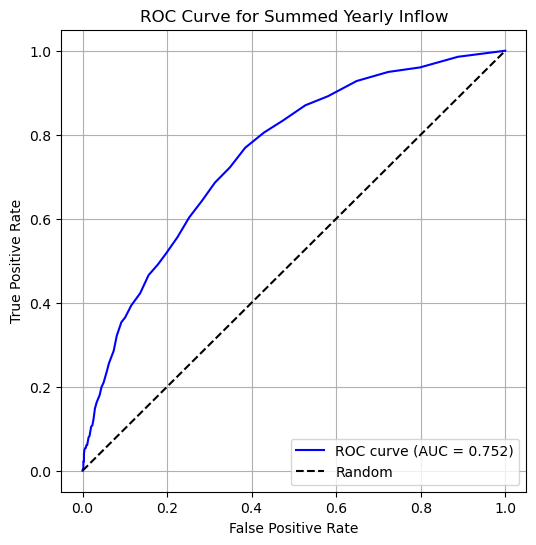

In [65]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Summed Yearly Inflow')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [71]:
# all features
# If higher inflow means lower delinquency, invert the feature
df_eval = df_eval.dropna(subset=['DQ_TARGET'])
features = df_eval[['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                   'pct_spend_gambling', 'pct_spend_essentials', 'delta_groceries_3m', 'pct_spend_utilities',\
                   'has_overdraft_6m', 'has_acct_fee_6m', 'atm_cash_freq_6m', 'refund_ratio', 'debt_spend_ratio',\
                   'bnpl_usage_flag', 'debt_category_count', 'discretionary_drop_flag_3m', 'essential_spend_volatility_6m',\
                   'atm_cash_ratio', 'child_dependents_6m', 'pets_6m']]
y_true = df_eval['DQ_TARGET']

# Train the model:
X_train, X_test, y_train, y_test = train_test_split(features, y_true, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
print(f"Random Forest AUC: {auc:.3f}")

# Also check feature importance:
feature_names = ['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions', 'sum_groceries_9m', 'sum_dining_6m',\
                'pct_spend_gambling','pct_spend_essentials', 'delta_groceries_3m', 'pct_spend_utilities',\
                'has_overdraft_6m', 'has_acct_fee_6m', 'atm_cash_freq_6m', 'refund_ratio', 'debt_spend_ratio',\
                'bnpl_usage_flag', 'debt_category_count', 'discretionary_drop_flag_3m', 'essential_spend_volatility_6m',\
                'atm_cash_ratio', 'child_dependents_6m', 'pets_6m']
importances = rf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

Random Forest AUC: 0.741
avg_yearly_inflow: 0.087
std_inflow: 0.068
trend: 0.067
num_transactions: 0.044
sum_groceries_9m: 0.068
sum_dining_6m: 0.071
pct_spend_gambling: 0.020
pct_spend_essentials: 0.074
delta_groceries_3m: 0.073
pct_spend_utilities: 0.068
has_overdraft_6m: 0.013
has_acct_fee_6m: 0.009
atm_cash_freq_6m: 0.036
refund_ratio: 0.058
debt_spend_ratio: 0.060
bnpl_usage_flag: 0.007
debt_category_count: 0.022
discretionary_drop_flag_3m: 0.004
essential_spend_volatility_6m: 0.070
atm_cash_ratio: 0.063
child_dependents_6m: 0.007
pets_6m: 0.008


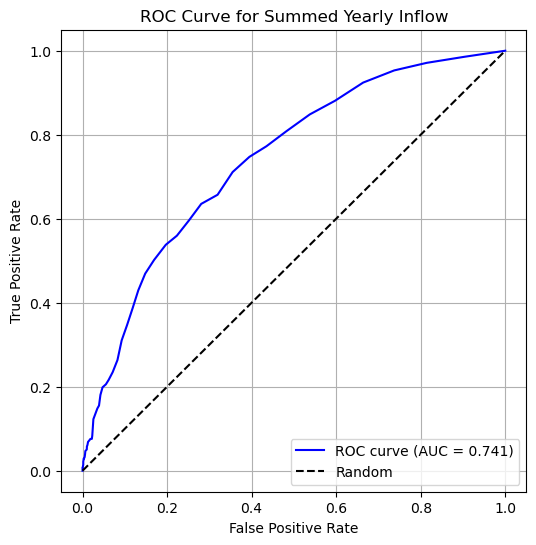

In [72]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Summed Yearly Inflow')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
